In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

mpl.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('../../data/clean/house_data.csv', usecols=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement'])
df.drop_duplicates(inplace=True)
df.dropna(axis=0, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0


---
<h1>1. Central Tendency Measures (Mean, Median and Mode)</h1>
<img src="../../images/centraltendency.JPG" style="background:white; display: block; margin-left: auto;margin-right: auto; width:50%"/>
<ul style="font-size:13px">
    <li><strong>Mean</strong> — The average of all data points<ul>
            <li>Equals the sum of observations divided by the size of the sample
            <li>However, the mean doesn’t always locate the center of the data accurately especially when our data in a skewed distribution
            <li>Outliers have a substantial impact on the mean
            <li>ie. : if wages of 3 restaurant employees are $12, $14 and $15 per hour, then the average wage is $13.6 per hou
        </ul>
    <li><strong>Median</strong> — The data point where half of the data lies above and half below it<ul>
            <li>Also known as 50th percentile, the sample median is the middle number when the observations are written out in order
            <li>The median is more resistant to outliers and skewed data
            <li>When we have a skewed distribution, the median is a better measure of central tendency than the mean
            <li>ie. : if median income in a county is $100,000 per year, we could simply say that half the population has higher and the remaining half has lower than $100k income in the county
        </ul>
    <li><strong>Mode</strong> — The most common value in the data<ul>
            <li>Typically, we use the mode with categorical, ordinal, and discrete data
            <li>In fact, the mode is the only measure of central tendency that we can use with categorical data
            <li>ie. : Mode can help a grocery chain figure out which product is selling the most on different days of the week, month or year
        </ul>
</ul><br>
<p style="font-size:13px">
Which is the best?<ul>
    <li>When we have a symmetrical distribution for continuous data, the mean, median, and mode are equal
    <li>If we have a skewed distribution, the median is often the best measure of central tendency
    <li>When we have ordinal data, the median or mode is usually the best choice
    <li>For categorical data, we have to use the mode
</ul>
</p>

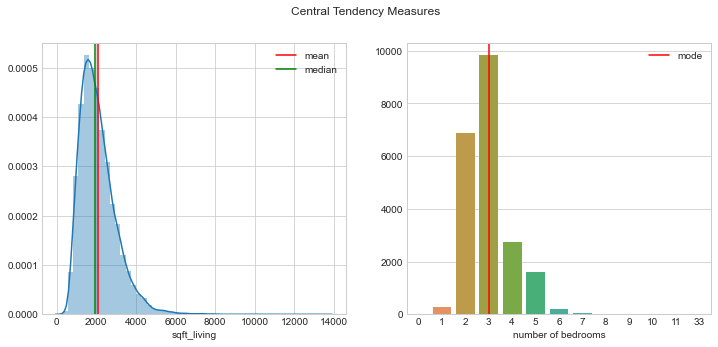

In [3]:
mpl.style.use('seaborn-whitegrid')

mean_val = df.sqft_living.describe(include='all')['mean']
med_val = df.sqft_living.describe(include='all')['50%']
mode_val = df.bedrooms.mode()[0]

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,5))

sns.distplot(df.sqft_living, kde=True, norm_hist=False, ax=ax[0])
ax[0].axvline(mean_val, color='red', label='mean')
ax[0].axvline(med_val, color='green', label='median')
ax[0].legend(loc='upper right')

sns.barplot(df.bedrooms.unique(), df.bedrooms.value_counts(), ax=ax[1])
ax[1].axvline(mode_val, color='red', label='mode')
ax[1].legend(loc='upper right')
ax[1].set_xlabel('number of bedrooms')
ax[1].set_ylabel('')

plt.suptitle('Central Tendency Measures')
plt.show()

---
<h1>2. Measures of Variability (Range, IQR, Variance and Standard Deviation)</h1>
<p style="font-size:13px">Let’s think, in certain cases, we are comparing two groups. we have already calculated the central tendency of our data i.e. Mean, Median and Mode for both the groups. Sometimes it may happen that mean, median, and mode are same for both groups. This indicates that, if we adequately describe a distribution some time it may need more information than the measures of central tendency so in this situation measures of variability comes into picture.<br>
<ul style="font-size:13px">
    <li><strong>Range</strong><ul>
            <li>The most simple measure of variability
            <li>It is the difference between the highest and the lowest value
            <li>As ranges takes only the count of extreme values sometimes it may not give us a good impact on variability
            <li>ie. : the range of 73, 79, 84, 87, 88, 91, and 94 is 21, because 94 – 73 is 21
        </ul><br>
    <li><strong>IQR</strong><ul>
            <li><img src="../../images/IQR.png" style="background:white; width:25%"/>
            <li>The IQR is a measure of variability, based on dividing a data set into quartiles or in short is the range of the middle 50% of the scores in a distribution
            <li>It is a better measure of dispersion than range because it leaves out the extreme values
            <li>IQR = Q3 (75th percentile) - Q1 (25th percentile)
            <li>It equally divides the distribution into four equal parts called quartiles<ul>
                    <li>Q1 is the 25% of the distribution data
                    <li>Q2 is the 50% of the distribution data and basically it is same as Median
                    <li>Q3 is the 75% of the distribution data
                </ul>
            <li>As a rule of thumb, observations can be qualified as outliers when they lie more than 1.5 IQR below the first quartile or 1.5 IQR above the third quartile<ul>
                    <li>Outliers = Q1 – 1.5 * IQR
                    <li>Outliers = Q1 + 1.5 * IQR
                </ul>
        </ul><br>
    <li><strong>Variance</strong><ul>
            <li><img src="../../images/variance.png" style="background:white; width:20%"/>
            <li>Using the mean as the measure of the middle of the distribution, Variance is defined as the average squared difference of the scores from the mean
            <li>The variance includes all values in the calculation by comparing each value to the mean by calculating a set of squared differences between the data points and the mean, sum them, and then divide by the number of observations -> it’s the average squared difference
            <li>Because the calculations use the squared differences, the variance is in squared units rather the original units of the data
            <li>While higher values of the variance indicate greater variability, there is no intuitive interpretation for specific values
        </ul><br>
    <li><strong>Standard Deviation</strong><ul>
            <li><img src="../../images/std.JPG" style="background:white; width:30%"/>
            <li>The standard deviation is simply the square root of the variance
            <li>When we have normally distributed data, or approximately so, the standard deviation becomes particularly valuable
            <li>A low standard deviation indicates that the data points tend to be very close to the mean while a high standard deviation indicates that the data points are spread out over a large range of values
            <li>The value of standard deviation can be easily impacted by outliers as a single outlier distorts the overall mean
            <li>Data with a higher standard deviation, however, will be more unpredictable
            <li>ie. : if we are told that the average starting salary for someone working at Company XYZ is $70,000, we may think, “Wow! That’s great.” But if the standard deviation for starting salaries at Company XYZ is $20,000, that’s a lot of variation in terms of how much money we can make, so the average starting salary of $70,000 isn’t as informative in the end but  if the standard deviation was only $5,000, we would have a much better idea of what to expect for a starting salary at that company
        </ul>
</ul>
</p>

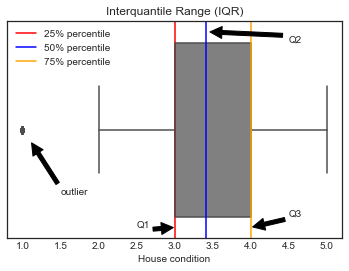



Measurement values for 'condition' feature:
mean 3.409553786335864
variance 0.42354508880301994
standard deviation 0.6508034179404868


In [4]:
mpl.style.use('seaborn-white')

q1_val = df.condition.quantile([0.25,0.5,0.75])[0.25]
q3_val = df.condition.quantile([0.25,0.5,0.75])[0.75]
max_val = q3_val + 1.5 * (q3_val - q1_val)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,4))
sns.boxplot(df.condition, color='gray', ax=ax)
ax.annotate('outlier', xy=(1.1, 0.05), xytext=(1.5, 0.3), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Q1', xy=(q1_val, 0.45), xytext=(2.5, 0.45), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Q3', xy=(q3_val, 0.45), xytext=(4.5, 0.4), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Q2', xy=(df.condition.mean(), -0.45), xytext=(4.5, -0.4), arrowprops=dict(facecolor='black', shrink=0.05))
ax.axvline(q1_val, color='red', label='25% percentile')
ax.axvline(df.condition.mean(), color='blue', label='50% percentile')
ax.axvline(q3_val, color='orange', label='75% percentile')
ax.set_xlabel('House condition')
ax.legend(loc='upper left')
ax.set_title('Interquantile Range (IQR)')
plt.show()

var_val = np.var(df.condition)
std_val = np.std(df.condition)
mean_val = df.condition.mean()
print(f"\n\nMeasurement values for 'condition' feature:\nmean {mean_val}\nvariance {var_val}\nstandard deviation {std_val}")

---
<h1>3. Skewness and Kurtosis</h1>
<img src="../../images/skew.jpeg" style="background:white; margin-left: 10%; width:44%"/>
<img src="../../images/kurto.jpeg" style="background:white; width:30%"/>
<p style="font-size:13px">In statistics, normality tests are used to determine whether a data set is modeled for normal distribution. Many statistical functions require that a distribution be normal or nearly normal.</p>
<ul style="font-size:13px">
    <li><strong>Skewness</strong><ul>
            <li>Skewness is usually described as a measure of a dataset’s symmetry or lack of symmetry in data distribution
            <li>Type of skewness:<ul>
                    <li><strong>Positive</strong> — means when the tail on the right side of the distribution is longer or fatter then the mean and median will be greater than the mode
                    <li><strong>Negative</strong> — is when the tail of the left side of the distribution is longer or fatter which means the mean and median will be less than the mode
                </ul>
            <li>A perfectly symmetrical data or normal distribution set will have a skewness of 0
            <li>The rule of thumb:<ul>
                        <li>If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
                        <li>If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed
                        <li>If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed
                </ul>
            <li>ie. : Suppose we have house values ranging from $100k to $1000k with the average being $500k, if the peak of the distribution was left of the average value, portraying a positive skewness in the distribution then it would mean that many houses were being sold for less than the average value which could be for many reasons
        </ul>
    <li><strong>Kurtosis</strong><ul>
            <li>Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution
            <li>Kurtosis is all about the tails of the distribution, not the peakedness or flatness
            <li>The kurtosis is 3 for a normal distribution
            <li>Type of kurtosis:<ul>
                    <li><strong>Mesokurtic</strong><ul>
                            <li>Kurtosis = 3
                            <li>This distribution has kurtosis statistic similar to that of the normal distribution
                            <li>It means that the extreme values of the distribution are similar to that of a normal distribution characteristic
                        </ul>
                    <li><strong>Leptokurtic</strong><ul>
                            <li>Kurtosis > 3
                            <li>Compared to a normal distribution, its tails are longer and fatter, and often its central peak is higher and sharper
                            <li>Data are heavy-tailed or profusion of outliers
                        </ul>
                    <li><strong>Platykurtic</strong><ul>
                            <li>Kurtosis < 3
                            <li>Compared to a normal distribution, its tails are shorter and thinner, and often its central peak is lower and broader
                            <li>Data are light-tailed or lack of outliers
                        </ul>
                </ul>
            <li>Kurtosis level:<ul>
                    <li><strong>High kurtosis</strong><ul>
                            <li>Data has heavy tails or outliers
                            <li>Need to investigate why do we have so many outliers
                            <li>It indicates a lot of things, maybe wrong data entry or other things. Investigate!
                        </ul>
                    <li><strong>Low kurtosis</strong><ul>
                            <li>Data has light tails or lack of outliers
                            <li>Too good to be true
                            <li>Need to investigate and trim the dataset of unwanted results
                        </ul>
                </ul>
        </ul>
</ul><br>
<p style="font-size:13px"><strong>Important note: In short, skewness and kurtosis are practically worthless. Shewhart made this observation in his first book. The statistics for skewness and kurtosis simply do not provide any useful information beyond that already given by the measures of location and dispersion. So, don't put much emphasis on skewness and kurtosis values we may see. And remember, the more data we have, the better we can describe the shape of the distribution.</strong></p>

In [5]:
from scipy.stats import kurtosis, skew

# Using python built-in function
df_skew_builtin = pd.DataFrame(df.skew(), columns=['skew-builtin'])
df_kurto_builtin = pd.DataFrame(df.kurtosis(), columns=['kurtosis-builtin'])

# Using scipy
df_skew_scipy = pd.DataFrame(skew(df), columns=['skew-scipy']).set_index([pd.Index(df.skew().index.values.tolist())])
df_kurto_scipy =pd.DataFrame(kurtosis(df), columns=['kurtosis-scipy']).set_index([pd.Index(df.kurtosis().index.values.tolist())])

# display values
display(df_skew_builtin.join([df_skew_scipy,df_kurto_builtin,df_kurto_scipy]))

,skew-builtin,skew-scipy,kurtosis-builtin,kurtosis-scipy
price,4.023474,4.023194,34.573010,34.564732
bedrooms,1.974503,1.974366,49.072834,49.061200
bathrooms,0.511327,0.511292,1.279353,1.278779
sqft_living,1.471296,1.471194,5.240844,5.239354
sqft_lot,13.057687,13.056780,284.973358,284.907131
floors,0.616365,0.616323,-0.484998,-0.485163
condition,1.032360,1.032289,0.524719,0.524320
grade,0.771801,0.771747,1.191923,1.191369
sqft_above,1.446656,1.446555,3.401135,3.400070
sqft_basement,1.577669,1.577560,2.713877,2.712971


---
<h1>4. Normality Test (<a href="https://en.wikipedia.org/wiki/Normality_test">source</a>)</h1>
<ul style="font-size:13px">
    <li><strong>Anderson-Darling</strong><ul>
            <li><img src="../../images/normalitytest.JPG" style="background:white; width:20%"/>
            <li>The Anderson-Darling tests if data comes from a particular distribution
            <li>This is a more sensitive test to check different distributions
            <li>If the returned statistic is larger than critical values then for the corresponding significance level, the null hypothesis (h0) that the data come from the chosen distribution can be rejected
        </ul>
    <li><strong>Lilliefors</strong><ul>
            <li>The Lilliefors test is strongly based on the Kolmogorov-Smirnov test
            <li>The difference is that in the Lilliefors test, it is accepted that the mean and variance of the population distribution are estimated rather than pre-specified by the user
            <li>P-Value<ul>
                    <li> > 0.05 : h0 is accepted — normal distribution
                    <li> < 0.05 : h0 is rejected
                </ul>
        </ul>
    <li><strong>Kolmogorov-Smirnov</strong><ul>
            <li>The Kolmogorov–Smirnov tests if a sample distribution fits a cumulative distribution function (CDF) of are referenced distribution
            <li>P-Value<ul>
                    <li> > 0.05 : h0 is accepted — normal distribution
                    <li> < 0.05 : h0 is rejected
                </ul>
        </ul>
    <li><strong>Shapiro-Wilk (this test has the best power for a given significance)</strong><ul>
            <li>The Shapiro Wilk test is the most powerful test when testing for a normal distribution
            <li>This test is not suitable for data that has size more than 5000
            <li>P-Value<ul>
                    <li> > 0.05 : h0 is accepted — normal distribution
                    <li> < 0.05 : h0 is rejected
                </ul>
        </ul>
</ul>

In [6]:
from scipy.stats import anderson, kstest, norm, shapiro
from statsmodels.stats.diagnostic import lilliefors

# Anderson-Darling test
pval_anderson = anderson(df.sqft_living, dist='norm').statistic
min_anderson = anderson(df.sqft_living, dist='norm').critical_values
stat_anderson = np.array([True for i in min_anderson if pval_anderson < i]).sum() > 1
andr = [pval_anderson, min_anderson, stat_anderson]

# Lilliefors test
_, pval_lilliefors = lilliefors(df.sqft_living[:100], dist='norm')
min_lilliefors = 0.05
stat_lilliefors = pval_lilliefors > min_lilliefors
lillie = [pval_lilliefors, min_lilliefors, stat_lilliefors]

# Kolmogorov-Smirnov test
_, pval_ks = kstest(df.sqft_living[:100], 'norm')
min_ks = 0.05
stat_ks = pval_ks > min_ks
ks = [pval_ks, min_ks, stat_ks]

# Shapiro-Wilk test
_, pval_shapiro = shapiro(df.sqft_living[:100])
min_shapiro = 0.05
stat_shapiro = pval_shapiro > min_shapiro
shpr = [pval_shapiro, min_shapiro, stat_shapiro]

# Visualize
display(pd.DataFrame([andr, lillie, ks, shpr],
        columns=['p-value', 'alpha', 'is h0 accepted?']).set_index([pd.Index(['anderson', 'lilliefors', 'kolmogorov-smirnov', 'shapiro'])]))

,p-value,alpha,is h0 accepted?
anderson,326.850239,"[0.576, 0.656, 0.787, 0.918, 1.092]",False
lilliefors,0.043317,0.05,False
kolmogorov-smirnov,0.000000,0.05,False
shapiro,0.000036,0.05,False


---
<h1>5. Statistical Test</h1>
<ul style="font-size:13px">
    <li><strong>Z-Test</strong><ul>
            <li>
            <li>
        </ul>
    <li><strong>T-Test</strong><ul>
            <li>
            <li>
        </ul>
    <li><strong>ANOVA</strong><ul>
            <li>
            <li>
        </ul>
    <li><strong>Chi-Square Test</strong><ul>
            <li>
            <li>
        </ul>
</ul>

---
<h1>6. Correlation</h1>